<a href="https://colab.research.google.com/github/gillesvtsilvano/IA-PPGEEC-Winter_Course/blob/master/Flowplayer_Selenium_YOLOv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FlowPlayer, Selenium and YOLOv3 (Darknet)

Description: <mark>TODO</mark>

# Getting Images from a LiveCam with Selenium

## Setting up Selenium and Cromedriver



In [77]:
!pip install --upgrade pip
!pip install selenium
!apt update
!apt install chromium-chromedriver

     |████████████████████████████████| 1.4MB 2.8MB/s 
  Found existing installation: pip 19.1.1
    Uninstalling pip-19.1.1:
      Successfully uninstalled pip-19.1.1
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:3 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Get:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Get:10 http://arch

## Importing Libs and instantiate Chromedriver

In [0]:
import sys
from time import sleep
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options 
from selenium.webdriver.common.action_chains import ActionChains
from PIL import Image
from io import BytesIO


# Headless Google Chrome
chrome_options = Options()  
chrome_options.add_argument("--headless")
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

if '/usr/lib/chromium-browser/chromedriver' not in sys.path:
  # Bug: after add to path, still need to pass as an argument to Chrome()
  sys.path.append('/usr/lib/chromium-browser/chromedriver')

driver = webdriver.Chrome(executable_path='/usr/lib/chromium-browser/chromedriver', options=chrome_options)

## Accessing the web page

In [0]:
url="http://sttu.gtrans.com.br/"
driver.get(url)

## Clicking on 'add video' button

In [0]:
add_video_btn = driver.find_element_by_xpath('//*[@id="v1"]/div/div/a')
add_video_btn.click()
# TODO: remove css/js animations instead of wait for them. Maybe https://stackoverflow.com/questions/11131875/what-is-the-cleanest-way-to-disable-css-transition-effects-temporarily
sleep(2) # Wait elements to load

## Selecting Prudente de Morais by executing onclick script

In [0]:
# Find a more elegant way to select the video
# Maybe just call .click()?
target_video = driver.find_element_by_xpath('//*[@id="modal-cameras"]/div/div/div[2]/div/div[2]/div/a')
click_action = target_video.get_attribute('onclick')
driver.execute_script(click_action)
sleep(2) # Wait

## Hiding video UI elements

In [0]:
video_embedded_el = driver.find_element_by_id('video_v1_1')
js_snippet = "attr = arguments[0].attributes.getNamedItem('class'); attr.value=arguments[1]; arguments[0].attributes.setNamedItem(attr)";
new_class_attrs = 'flowplayer fp-default-playlist is-live is-ready is-live-position is-playing is-mouseout'
driver.execute_script(js_snippet, video_embedded_el, new_class_attrs)

## Getting rid of the caption black rectangle

In [0]:
video_caption = driver.find_element_by_xpath('//*[@id="v1"]/div/div/div[2]')
driver.execute_script('arguments[0].style.visibility = "hidden";', video_caption)

## Getting an screenshot of the video

In [0]:
video = driver.find_element_by_id('v1')
sleep(2)
png = video.screenshot_as_png
im = Image.open(BytesIO(png))

## Croping image and save it as 'ss.png'

In [0]:
width,height = im.size
crop = im.crop((86, 0, width-86, height))
crop.save('ss.png')

## Showing final image for 'visual' results

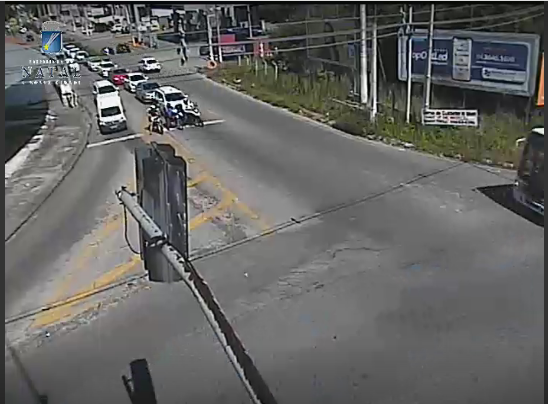

In [86]:
from IPython.display import Image as iImage

iImage(filename='ss.png')
#show_img('ss.png')

## Create a loop to get an image per second (need to think more about this)

In [0]:
for i in range(1000):
  png = video.screenshot_as_png
  im = Image.open(BytesIO(png))
  width,height = im.size
  crop = im.crop((86, 0, width-86, height))
  crop.save(outdir + '{}.png'.format(i))
  
  # min interval
  sleep(1*60)

In [0]:
# Need to mount drive first
outdir="/content/drive/My Drive/UFRN/UFRN - Doutorado/output"

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Do this if saving ouptut files on local drive instead on Google Drive's storage
#!mkdir -p output
#outdir="./output/"

# Creating the dataset with LabelImg

- https://github.com/tzutalin/labelImg
- https://towardsdatascience.com/yolov2-to-detect-your-own-objects-soccer-ball-using-darkflow-a4f98d5ce5bf

# Setting up YOLOv3

In [0]:
import warnings
warnings.filterwarnings('ignore')

!rm -rf darknet
!git clone https://github.com/pjreddie/darknet
!pip install opencv-python

Cloning into 'darknet'...
remote: Enumerating objects: 5901, done.
remote: Total 5901 (delta 0), reused 0 (delta 0), pack-reused 5901
Receiving objects: 100% (5901/5901), 6.16 MiB | 22.68 MiB/s, done.
Resolving deltas: 100% (3922/3922), done.


In [0]:
import os
if os.path.exists('darknet'):
  os.chdir('darknet')
!make --silent 2> /dev/null

In [0]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2019-07-31 14:54:54--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  32.1MB/s    in 7.8s    

2019-07-31 14:55:02 (30.5 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [0]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

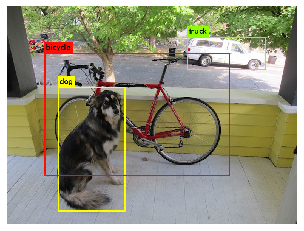

In [0]:
import cv2
import matplotlib.pyplot as plt
import os.path

fig,ax = plt.subplots()
ax.tick_params(labelbottom="off",bottom="off")
ax.tick_params(labelleft="off",left="off")
ax.set_xticklabels([]) 
ax.axis('off')

file = './predictions.jpg'
if os.path.exists(file):
  img = cv2.imread(file)
  
  show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  #plt.figure(figsize = (600, 600))
  plt.imshow(show_img)

## Changing configuration file for GPU support

In [0]:
import os
os.chdir('darknet')
with open('Makefile', 'r+') as f:
  s = f.read()
  s = s.replace('GPU=0', 'GPU=1')
  f.write(s)

In [0]:
"teste.png"[:-3]

'teste.'

## Preparing dataset

In [0]:
import os
images = os.listdir("/content/drive/My Drive/UFRN/UFRN - Doutorado/output")
for file in images[:]: # [:] makes a copy of filelist
  if not file.endswith('.png') or not os.path.exists("/content/drive/My Drive/UFRN/UFRN - Doutorado/output/" + file[:-4] + '.txt'):
    images.remove(file)

## Shuffling list of images

In [0]:
from random import shuffle
import math

shuffle(images)

## Splitting test and train images

In [0]:
train_perc = 20

l = len(images)
idx_split = math.floor(l /100 * math.ceil(train_perc))
train_images = images[idx_split:]
test_images = images[:idx_split]

## Concatenating path to each filename

In [0]:
train_images = ["/content/drive/My Drive/UFRN/UFRN - Doutorado/output/" + x for x in train_images]
test_images = ["/content/drive/My Drive/UFRN/UFRN - Doutorado/output/" + x for x in test_images]

## Download Yolo weights

In [0]:
import requests
url = 'https://pjreddie.com/media/files/yolov3.weights'
#url = 'https://pjreddie.com/media/files/darknet53.conv.74'
r = requests.get(url, allow_redirects=True)
open('yolov3.weights', 'wb').write(r.content)

162482580

## Configuring Yolo files

In [0]:
!ls

backup	  include	 LICENSE.gen   Makefile		results
cfg	  libdarknet.a	 LICENSE.gpl   obj		scripts
darknet   libdarknet.so  LICENSE.meta  predictions.jpg	src
data	  LICENSE	 LICENSE.mit   python		yolov3.weights
examples  LICENSE.fuck	 LICENSE.v1    README.md


In [0]:
!rm -rf /content/darknet/custom
os.mkdir('custom')

In [0]:
with open('cfg/yolov3.cfg', 'r+') as f:
  s = f.read()
  #s = s.replace('width=608', 'width=548')
  #s = s.replace('height=608', 'height=405')
  #s = s.replace('classes=80', 'classes=1')

  with open('custom/my.cfg', 'w') as c:
    c.write(s)

In [0]:
with open('/content/darknet/custom/obj.names', 'w') as f:
  f.write('car')
  
conf = ['classes=1\n',
        'train = custom/train.txt\n',
        'valid = custom/test.txt\n',
        'names = custom/obj.names\n',
        'backup = backup']

with open('/content/darknet/custom/obj.data', 'w') as f:
  f.writelines(conf)
  
with open('/content/darknet/custom/train.txt', 'w') as f:
  f.writelines([image + '\n' for image in train_images])
  
with open('/content/darknet/custom/test.txt', 'w') as f:
  f.writelines([image + '\n' for image in test_images])

In [0]:
len(train_images)

800

https://github.com/ultralytics/yolov3/wiki/Example:-Train-Single-Class

In [0]:
!./darknet detector train custom/obj.data custom/my.cfg yolov3.weights

my
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152

In [0]:
!./darknet detect custom/my.cfg yolov3.weights /content/drive/My\ Drive/UFRN/UFRN\ -\ Doutorado/output/726.png

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

In [87]:
!./darknet detect custom/my.cfg yolov3.weights /content/darknet/ss.png

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

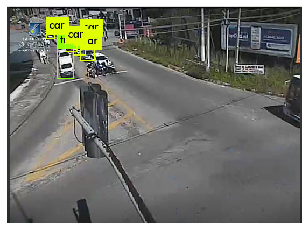

In [90]:
import cv2
import matplotlib.pyplot as plt
import os.path

fig,ax = plt.subplots()
ax.tick_params(labelbottom="off",bottom="off")
ax.tick_params(labelleft="off",left="off")
ax.set_xticklabels([]) 
ax.axis('off')

file = './predictions.jpg'
if os.path.exists(file):
  img = cv2.imread(file)
  
  show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  #plt.figure(figsize = (600, 600))
  plt.imshow(show_img)